In [1]:
#Importar librerias necesarias

import dnaplotlib as dpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline 
from skimage import io

In [2]:
# Required for drawing shapes
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib.patheffects import Stroke
import matplotlib.patches as patches

In [3]:
# Custom renderer for promoter -35 to -10 site (this is used by DNAplotlib to render the sites in a design)
def promoter_region (ax, type, num, start, end, prev_end, scale, linewidth, opts):
	# Default parameters - these can be added to, but we usually use this style (probably should simplify in future)
	y_offset = 0.0
	color_35 = (0.5,0.5,0.5)
	color_10 = (0.5,0.5,0.5)
	color_connector = (0,0,0)
	linewidth_connector = 2.0
	len_35 = 4
	len_10 = 2
	y_extent = 4.0
	# Update default parameters if provided
	if opts != None:
		if 'y_extent' in list(opts.keys()):
			y_extent = opts['y_extent']
		if 'y_offset' in list(opts.keys()):
			y_offset = opts['y_offset']
		if 'linewidth' in list(opts.keys()):
			linewidth = opts['linewidth']
		if 'color_35' in list(opts.keys()):
			color_35 = opts['color_35']
		if 'color_10' in list(opts.keys()):
			color_10 = opts['color_10']
		if 'color_connector' in list(opts.keys()):
			color_connector = opts['color_connector']
		if 'linewidth_connector' in list(opts.keys()):
			linewidth_connector = opts['linewidth_connector']
		if 'len_35' in list(opts.keys()):
			len_35 = opts['len_35']
		if 'len_10' in list(opts.keys()):
			len_10 = opts['len_10']
	# Check direction (we don't use at moment)
	fwd = True
	if start > end:
		fwd = False
	# Draw the -35 site (from start to start + length of -35 site)
	p35 = Polygon([(start, y_offset), 
		           (start, y_offset+y_extent),
		           (start+len_35,y_offset+y_extent),
		           (start+len_35,y_offset)],
		            edgecolor=(0,0,0), facecolor=color_35, linewidth=linewidth, zorder=11, 
		            path_effects=[Stroke(joinstyle="miter")])		
	ax.add_patch(p35)
	# Draw the -10 site (from end-length of -10 site to end)
	p10 = Polygon([(end-len_10, y_offset), 
		           (end-len_10, y_offset+y_extent),
		           (end,y_offset+y_extent),
		           (end,y_offset)],
		            edgecolor=(0,0,0), facecolor=color_10, linewidth=linewidth, zorder=11, 
		            path_effects=[Stroke(joinstyle="miter")])		
	ax.add_patch(p10)
	l1 = Line2D([start+len_35, end-len_10],
                [y_offset+(y_extent/2.0), y_offset+(y_extent/2.0)], linewidth=linewidth_connector, 
                color=color_connector, zorder=10)
	ax.add_line(l1)

	# Add a label if needed
	if opts != None and 'label' in list(opts.keys()):
		if final_start > final_end:
			dpl.write_label(ax, opts['label'], final_end+((final_start-final_end)/2.0), opts=opts)
		else:
			dpl.write_label(ax, opts['label'], final_start+((final_end-final_start)/2.0), opts=opts)
	# Return the final start and end positions to the DNA renderer
	return start, end


In [650]:
# Crear el renderer de dnaplotlib
dr = dpl.DNARenderer(scale=5, linewidth=0.7)
part_renderers = dr.SBOL_part_renderers()
part_renderers['PromoterRegion'] = promoter_region

In [848]:
# Funcion para pasar colores a RGB con valores de 0 y 1
#Para encontrar el color que quiero uso la pagina rgb.to

def RGB01converter(rgbcode):
    rgb01 = (rgbcode[0]/256,rgbcode[1]/256,rgbcode[2]/256)
    print (rgb01)

rgbcode = (0, 85, 255)

RGB01converter(rgbcode)

def lighten_color (col, fac):
    r = col[0] + (fac*(1.0-col[0]))
    g = col[1] + (fac*(1.0-col[1]))
    b = col[2] + (fac*(1.0-col[2]))
    return (r,g,b)

lighten_color ((0.0, 0.33203125, 0.99609375), 0.3)

(0.0, 0.33203125, 0.99609375)


(0.3, 0.532421875, 0.997265625)

In [855]:
# Crear el constructo programable para graficar
prom1 = {'type':'Promoter', 'name':'prom1', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':10, 'label':'Mpef1a', 'label_size': 5, 'label_color':(0,0,0), 'label_y_offset':14,'label_x_offset':2, 'start_pad':2,'end_pad':-5}}
cds1_2 = {'type':'CDS', 'name':'cds1.2', 'fwd':True, 'opts':{'color':(0.0, 0.33203125, 0.99609375), 'x_extent':18,'label':'BD', 'label_size':7, 'label_color':(0,0,0), 'label_x_offset':0,'arrowhead_height':0, 'arrowhead_length':0}}
cds1_3 = {'type':'CDS', 'name':'cds1.3', 'fwd':True, 'opts':{'color':(0.99609375, 0.4140625, 0.0), 'x_extent':20,'label':'VP16', 'label_size':7, 'label_color':(0,0,0), 'label_x_offset':-1,'linewidth':0.9, 'start_pad':-0.5}}
term1= {'type':'Terminator', 'name':'term1', 'fwd':True,'opts':{ 'label':'NosT-35ST', 'label_size': 5, 'label_color':(0,0,0), 'label_y_offset':12,'label_x_offset':-5, 'start_pad':-2, 'end_pad':10}}

SP1 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':6,'y_extent':3 ,'label':'Sp', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
SP2 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':6,'y_extent':3 ,'label':'Sp', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
SP3 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':6,'y_extent':3 ,'label':'Sp', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
BB1 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0.3, 0.532421875, 0.997265625), 'x_extent':6,'y_extent':3 ,'label':'Box', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
BB2 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0.3, 0.532421875, 0.997265625), 'x_extent':6,'y_extent':3 ,'label':'Box', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
BB3 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0.3, 0.532421875, 0.997265625), 'x_extent':6,'y_extent':3 ,'label':'Box', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}
BB4 = {'type':'CDS', 'name':'SpacerPromoter', 'fwd':True, 'opts':{'color':(0.3, 0.532421875, 0.997265625), 'x_extent':6,'y_extent':3 ,'label':'Box', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0.5, 'arrowhead_height':0,
    'arrowhead_length':0,'end_pad':0}}

prom2 = {'type':'Promoter', 'name':'prom1', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':10, 'label':'pMin35S', 'label_size': 5, 'label_color':(0,0,0), 'label_y_offset':14,'label_x_offset':2, 'start_pad':5,'end_pad':-5}}
cds2_2 = {'type':'CDS', 'name':'cds1.2', 'fwd':True, 'opts':{'color':(0.82421875, 0.99609375, 0.0), 'x_extent':30,'label':'Venus', 'label_size':7, 'label_color':(0,0,0), 'label_x_offset':0}}
term2= {'type':'Terminator', 'name':'term1', 'fwd':True,'opts':{ 'label':'NosT-35ST', 'label_size': 5, 'label_color':(0,0,0), 'label_y_offset':12,'label_x_offset':-5, 'start_pad':-2, 'end_pad':10}}



cds3 = {'type':'CDS', 'name':'cds1.2', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':10,'label':'Spacer', 'label_size': 4, 'label_color':(1,1,1), 'label_x_offset':0, 'arrowhead_height':0,
    'arrowhead_length':0}}

prom4 = {'type':'Promoter', 'name':'prom4', 'fwd':True, 'opts':{'color':(0, 0, 0), 'x_extent':10, 'start_pad':10,'end_pad':-5}}
cds4 = {'type':'CDS', 'name':'cds4', 'fwd':True, 'opts':{'color':(0.2, 0.2, 0.2), 'x_extent':43, 'label':'Hygromycin Resistance', 'label_size': 4.5, 'label_color':(1,1,1), 'label_x_offset':-0.5}}
term4= {'type':'Terminator', 'name':'term4', 'fwd':True, 'opts':{'start_pad':-2}}


arc1 = {'type':'Activation', 'from_part':cds1_2, 'to_part':BB1, 'opts':{'color':(0, 0, 0), 'linewidth':0.7, 'arc_height':20, 'arrowhead_length':1,'arc_height_end':5,'arc_start_x_offset':9}}
arc2 = {'type':'Activation', 'from_part':cds1_2, 'to_part':BB2, 'opts':{'color':(0, 0, 0), 'linewidth':0.7, 'arc_height':20, 'arrowhead_length':1,'arc_height_end':5,'arc_start_x_offset':9}}
arc3 = {'type':'Activation', 'from_part':cds1_2, 'to_part':BB3, 'opts':{'color':(0, 0, 0), 'linewidth':0.7, 'arc_height':20, 'arrowhead_length':1,'arc_height_end':5,'arc_start_x_offset':9}}
arc4 = {'type':'Activation', 'from_part':cds1_2, 'to_part':BB4, 'opts':{'color':(0, 0, 0), 'linewidth':0.7, 'arc_height':20, 'arrowhead_length':1,'arc_height_end':5,'arc_start_x_offset':9}}

In [856]:
# Crear el diseno base
design1 = [prom1, cds1_2, cds1_3, term1,BB1,SP1,BB2,SP2,BB3,SP3,BB4,prom2,cds2_2, term2, cds3, prom4, cds4, term4]
reg1 = [arc1, arc2, arc3, arc4]


(0.0, 250.5, -25.0, 28.0)

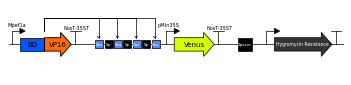

In [857]:
# Crear la figura
fig = plt.figure(figsize=(6,1.5))
gs = gridspec.GridSpec(1, 1)
ax_dna = plt.subplot(gs[0])
# Renderiar el ADN al eje
start, end = dr.renderDNA(ax_dna, design1, part_renderers,regs=reg1, reg_renderers=dr.std_reg_renderers())
ax_dna.set_xlim([start, end])
ax_dna.set_ylim([-25,28])
ax_dna.set_aspect('equal')
ax_dna.set_xticks([])
ax_dna.set_yticks([])
ax_dna.axis('off')



In [858]:
primer_f_opts = {'color':(1,1,1), 'y_offset':-8,'label':'200 pb', 'label_size': 4, 'label_color':(0,0,0),'label_x_offset':1}
primer1_f = {'type':'PrimerBindingSite', 'start': cds3['start'], 'end': cds3['end'], 'name':'pri1f', 'fwd':True, 'opts':primer_f_opts}
dr.annotate(ax_dna, part_renderers, primer1_f)

primer2_f_opts = {'color':(1,1,1), 'y_offset':-5.5,'label':'20 pb', 'label_size':3, 'label_color':(0,0,0),'label_x_offset':-2}
primer2_f = {'type':'PrimerBindingSite', 'start': SP1['start'], 'end':SP1['end'], 'name':'pri1f', 'fwd':True, 'opts':primer2_f_opts}
dr.annotate(ax_dna, part_renderers, primer2_f)

primer3_f_opts = {'color':(1,1,1), 'y_offset':-5.5,'label':'20 pb', 'label_size':3, 'label_color':(0,0,0),'label_x_offset':-2}
primer3_f = {'type':'PrimerBindingSite', 'start': SP2['start'], 'end':SP2['end'], 'name':'pri1f', 'fwd':True, 'opts':primer3_f_opts}
dr.annotate(ax_dna, part_renderers, primer3_f)

primer4_f_opts = {'color':(1,1,1), 'y_offset':-5.5,'label':'20 pb', 'label_size':3, 'label_color':(0,0,0),'label_x_offset':-2}
primer4_f = {'type':'PrimerBindingSite', 'start': SP3['start'], 'end':SP3['end'], 'name':'pri1f', 'fwd':True, 'opts':primer4_f_opts}
dr.annotate(ax_dna, part_renderers, primer4_f)


BD1 = {'type':'PromoterRegion', 'name':'region1', 'start': cds1_2['start']+35, 'end': term1['end']-11, 'fwd':True, 'opts':{'y_offset':23,'len_35':5, 'len_10':5, 'color_35':(0.0, 0.33203125, 0.99609375), 'color_10':(0.99609375, 0.4140625, 0.0), 'linewidth_connector':1.0, 'y_extent' : 4}}
dr.annotate(ax_dna, part_renderers, BD1)

BD1label = {'type':'PrimerBindingSite', 'start': 41, 'end': cds1_2['end'], 'name':'BD1label', 'fwd':True, 'opts':{'color':(1.0,1.0,1.0), 'y_offset':29, 'label':'TF (BD+VP16)', 'label_size': 3}}
dr.annotate(ax_dna, part_renderers, BD1label)



In [859]:
# Update subplot spacing
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

<Figure size 432x288 with 0 Axes>

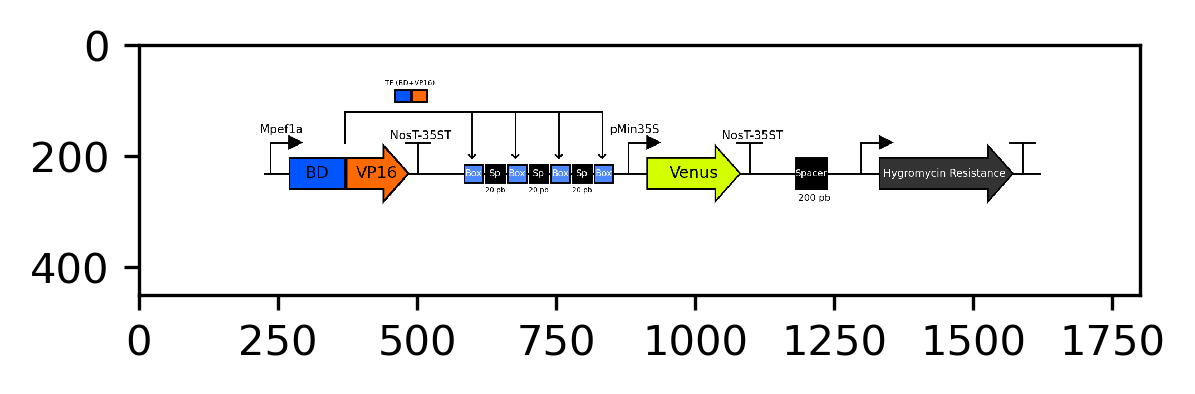

In [860]:
# Save the figure
fig.savefig('General.pdf', transparent=True)
fig.savefig('General.png', dpi=300)
# Clear the plotting cache
plt.close('all')
#Solo para ver cambios realizados en el codigo mas rapido
img = io.imread('General.png')
plt.figure(figsize=(4, 4), dpi=300)
io.imshow(img, cmap = 'gray')

## 